Importing relevant libraries.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking the correlation and drawing the heatmap.

In [6]:
corr_df = data.corr(method='spearman')
corr_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130734,0.185127,-0.085222,-0.126723,0.000132,-0.043242,0.607216,0.198689
Glucose,0.130734,1.000000,0.235191,0.060022,0.213206,0.231141,0.091293,0.285045,0.475776
BloodPressure,0.185127,0.235191,1.000000,0.126486,-0.006771,0.292870,0.030046,0.350895,0.142921
SkinThickness,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,0.180390,-0.066795,0.089728
Insulin,-0.126723,0.213206,-0.006771,0.541000,1.000000,0.192726,0.221150,-0.114213,0.066472
BMI,0.000132,0.231141,0.292870,0.443615,0.192726,1.000000,0.141192,0.131186,0.309707
DiabetesPedigreeFunction,-0.043242,0.091293,0.030046,0.180390,0.221150,0.141192,1.000000,0.042909,0.175353
Age,0.607216,0.285045,0.350895,-0.066795,-0.114213,0.131186,0.042909,1.000000,0.309040
Outcome,0.198689,0.475776,0.142921,0.089728,0.066472,0.309707,0.175353,0.309040,1.000000


<AxesSubplot:>

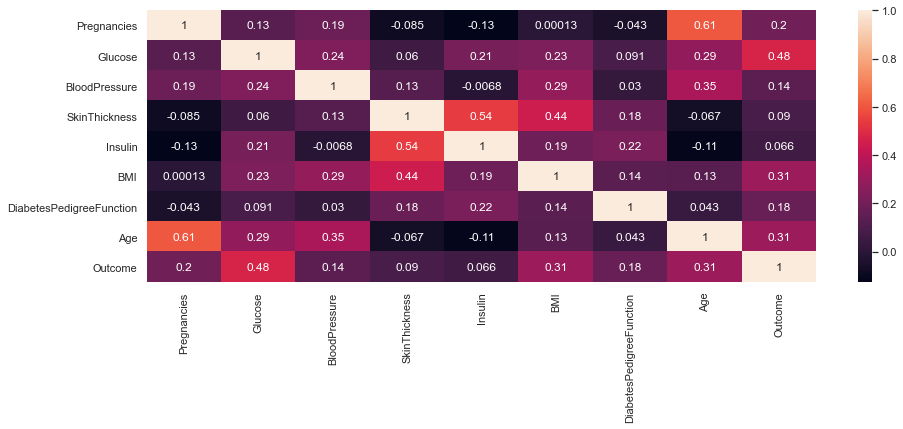

In [7]:
plt.figure(figsize =(15,5))
sns.heatmap(corr_df, annot = True)

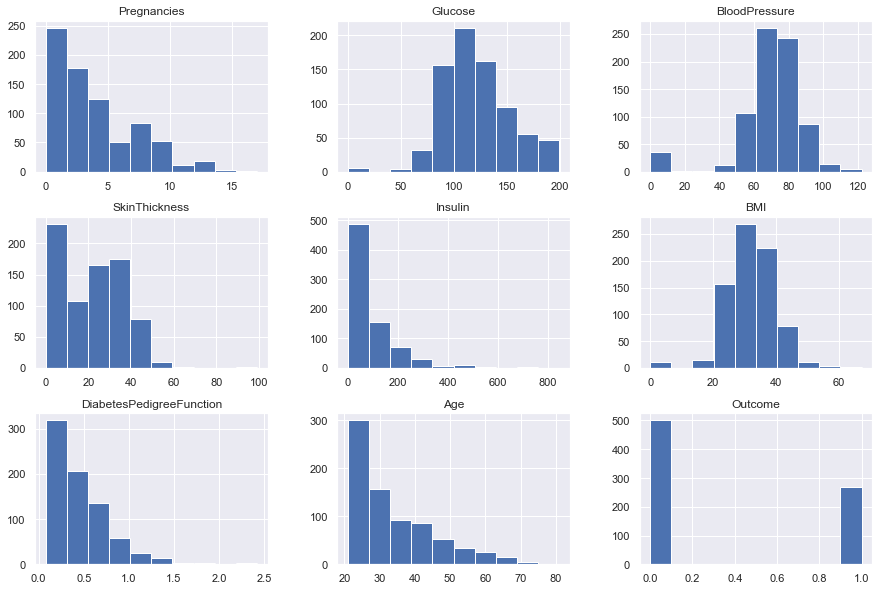

In [8]:
data.hist(figsize=(15,10))
plt.show()

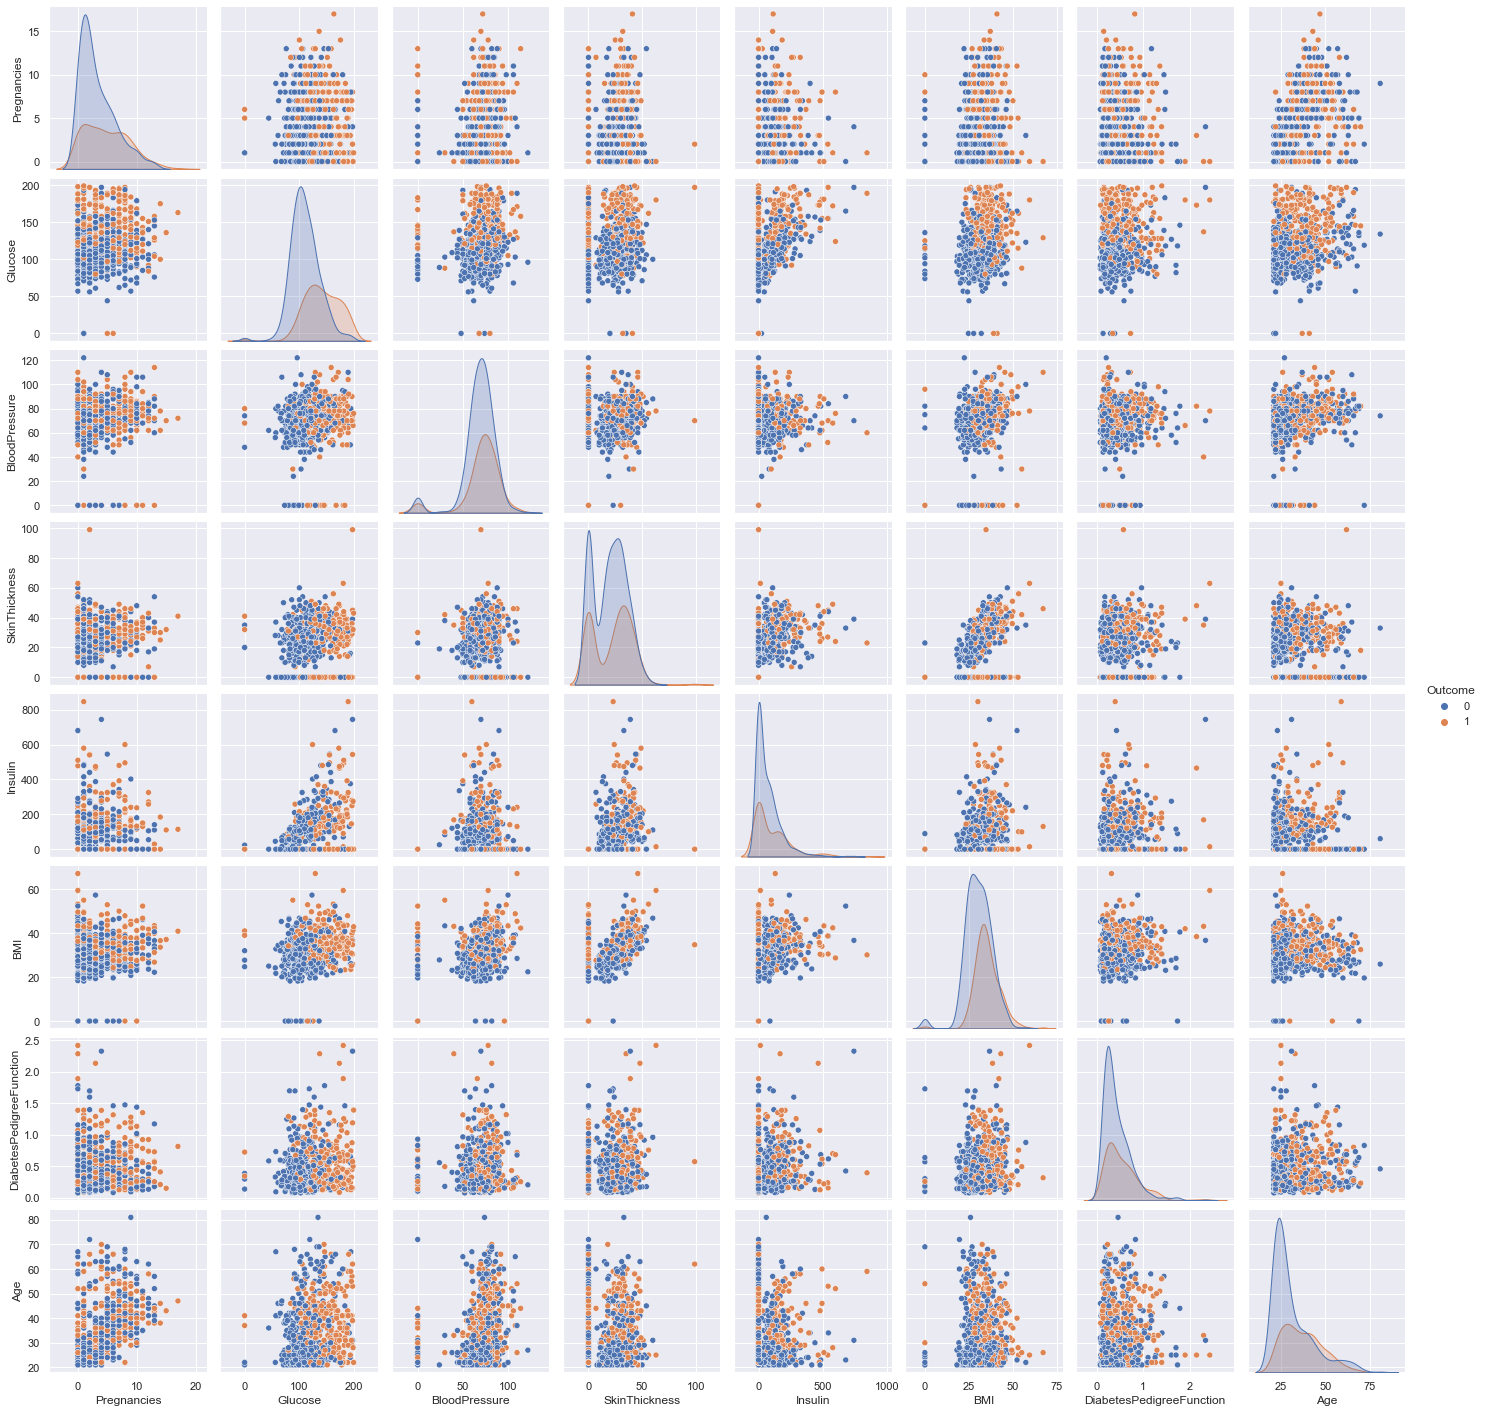

In [9]:
sns.pairplot(data,hue='Outcome')

Splitting trainning and testing data

In [10]:
print(data.shape)
y = data['Outcome']
print(y.shape)

(768, 9)
(768,)


In [11]:
data1 = data.drop(['Outcome'],axis = 1)

In [12]:
print(data.shape)
x = data1
print(x.shape)

(768, 9)
(768, 8)


---------------------------------------------------------------
Now we will use 3 techniques to build our decision tree.

Those are:


a> Decision Tree using Entropy and Information Gain from scratch.


b> Decision Tree using Gini Impurity from scratch.


c> Decision Tree using scikit-learn.

------------------------------------------------------------

Decision Tree using Entropy and Information Gain.

In [13]:
#Creating Entropy function.
def entropy(colm):
    counts = np.unique(colm, return_counts= True)
    N = float(colm.shape[0])
    
    entro = 0.0
    for i in counts[1]:
        p = i/N
        entro = (entro -(p*np.log2(p))) 
        
    return entro
        
    

In [14]:
colm = np.array([1,1,0,0])

In [15]:
entropy(colm)

1.0

In [16]:
#Creating function to divide our data.
def div_data(x_data,col_key,thres):
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns = x_data.columns)
    
    for i in range(x_data.shape[0]):
        val = x_data[col_key].loc[i]
        
        if val > thres:
            x_right = x_right.append(x_data.loc[i])
        else:
            x_left = x_left.append(x_data.loc[i])
            
    return x_left,x_right
    

In [17]:
#Creating Information Gain Function.
def information_gain(x_data,col_key,thres):
    left,right = div_data(x_data,col_key,thres)
    
    left_ratio = float(left.shape[0]/x_data.shape[0])
    right_ratio = float(right.shape[0]/x_data.shape[0])
    
    #All sample coming to one side.
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000000
    
    info_gain = entropy(x_data.Outcome) - ((left_ratio*entropy(left.Outcome))+(right_ratio*entropy(right.Outcome)))
    
    return info_gain

In [18]:
#Creating function for calculating Information Gain in our training data.
def calc_info_gain(x):
    
    for v in x.columns:
        print(f'The information gain for {v} is:',information_gain(data,v,data[v].mean()))
        

In [19]:
calc_info_gain(x)

The information gain for Pregnancies is: 0.026610468862794723
The information gain for Glucose is: 0.11919311396049659
The information gain for BloodPressure is: 0.014049123287568466
The information gain for SkinThickness is: 0.006669867154931675
The information gain for Insulin is: 0.009232986282522337
The information gain for BMI is: 0.046792718362333785
The information gain for DiabetesPedigreeFunction is: 0.015311441907764012
The information gain for Age is: 0.04252936780341576


As we can see, the information gain for Glucose is highest so we should use Glucose attribute first for splitting.

--------------------------


Decision Tree using Gini Impurity.

In [20]:
#Creating Gini Function.
def gini_index(colm):
    counts = np.unique(colm, return_counts= True)
    N = float(colm.shape[0])
    g = 0.0
    
    for i in counts[1]:
        p = i/N
        g = g +(p*p)
        gini = 1 - g
        
    return gini

In [21]:
col = np.array([1,1,1,2,3,2,3,1,2,3,2,3,3,3,2,2,2,2,2,1,1,1,1,2,3])
count = np.unique(col,return_counts = True)

In [22]:
count

(array([1, 2, 3]), array([ 8, 10,  7], dtype=int64))

In [23]:
gini_index(col)

0.6592

In [24]:
#Creating function for Total Gini Impurity.
def TotalGiniImpurity(x_data,col_key,thres):
    
    left,right = div_data(x_data,col_key,thres)
    
    left_ratio = float(left.shape[0]/x_data.shape[0])
    right_ratio = float(right.shape[0]/x_data.shape[0])
    
    #All sample coming to one side.
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000000
    
    t_gini_impurity = (left_ratio*gini_index(left.Outcome))+(right_ratio*gini_index(right.Outcome))
    
    
    
    
    return t_gini_impurity

In [25]:
#Creating function for calculating Gini Impurity in our training data.
def calc_gini_impurity(x):
    
    
    for v in x.columns:
        print(f'The total gini impurity for {v} is:',TotalGiniImpurity(data,v,data[v].mean()))
    
    
    
        
      
        

In [26]:
calc_gini_impurity(x)

The total gini impurity for Pregnancies is: 0.43761541063331877
The total gini impurity for Glucose is: 0.3810611150622417
The total gini impurity for BloodPressure is: 0.4456595038434661
The total gini impurity for SkinThickness is: 0.45019561274057684
The total gini impurity for Insulin is: 0.44850616010864613
The total gini impurity for BMI is: 0.425447181027364
The total gini impurity for DiabetesPedigreeFunction is: 0.44464075620214755
The total gini impurity for Age is: 0.4273326946812479


As we can see, the gini impurity for Glucose is lowest so we should use Glucose attribute first for splitting.

------------------

Now, we construct our DecisionTree Class.

In [27]:
class DecisionTree:
    def __init__(self,depth = 0,max_depth = 6):
        self.left = None
        self.right = None
        self.col_key = None
        self.thres = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
        
    def train(self,X_train,GINI = True):
        col_names = ["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction","Age"]
        if (GINI == True):
            
            gini = []
            for i in col_names:
                total_gini = TotalGiniImpurity(X_train,i,X_train[i].median())
                gini.append(total_gini)

            self.col_key = col_names[np.argmin(gini)]
            self.thres = X_train[self.col_key].median()
            print('Making tree on feature :',self.col_key)
            
            data_left,data_right = div_data(X_train,self.col_key,self.thres)
            data_left = data_left.reset_index(drop = True)
            data_right = data_right.reset_index(drop = True)

            #Making out true leaf node.
            if data_left.shape[0] == 0 or data_right.shape[0] == 0:
                if X_train.Outcome.mean() >= 0.5:
                    self.target = "Diabetic"
                else:
                    self.target = "Non Diabetic"

                return

            #Stopping early when depth >=max_depth.
            if (self.depth>=self.max_depth):
                if X_train.Outcome.mean() >= 0.5:
                    self.target = "Diabetic"
                else:
                    self.target = "Non Diabetic"

                return

            #Recursive condition for generating leaf node.
            self.left = DecisionTree(depth = self.depth+1,max_depth = self.max_depth)
            self.left.train(data_left)
            self.right = DecisionTree(depth = self.depth+1,max_depth = self.max_depth)
            self.right.train(data_right)

            if X_train.Outcome.mean() >= 0.5:
                    self.target = "Diabetic"
            else:
                self.target = "Non Diabetic"

                return

            
            return
        elif (GINI == False):
            
            info_gain = []
            for i in col_names:
                i_gain = information_gain(X_train,i,X_train[i].median())
                info_gain.append(i_gain)
                
            self.col_key = col_names[np.argmax(info_gain)]
            self.thres = X_train[self.col_key].median()
            print('Making tree on feature :',self.col_key)
            
            data_left,data_right = div_data(X_train,self.col_key,self.thres)
            data_left = data_left.reset_index(drop = True)
            data_right = data_right.reset_index(drop = True)

            #Making out true leaf node.
            if data_left.shape[0] == 0 or data_right.shape[0] == 0:
                if X_train.Outcome.median() >= 0.5:
                    self.target = "Diabetic"
                else:
                    self.target = "Non Diabetic"

                return

            #Stopping early when depth >=max_depth.
            if (self.depth>=self.max_depth):
                if X_train.Outcome.median() >= 0.5:
                    self.target = "Diabetic"
                else:
                    self.target = "Non Diabetic"

                return

            #Recursive condition for generating leaf node.
            self.left = DecisionTree(depth = self.depth+1,max_depth = self.max_depth)
            self.left.train(data_left)
            self.right = DecisionTree(depth = self.depth+1,max_depth = self.max_depth)
            self.right.train(data_right)

            if X_train.Outcome.median() >= 0.5:
                    self.target = "Diabetic"
            else:
                self.target = "Non Diabetic"

                return

            return
        
    
                
    
    
    def predict(self,test):
        if test[self.col_key]>self.thres:
            
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)
        
        
        
        
            
            
        
    

Splitting the data into train and test set.

In [28]:
split = int(0.75*data.shape[0])
train_data = data[:split]
test_data = data[split:]
test_data = test_data.reset_index(drop = True)
print(train_data.shape,test_data.shape)

(576, 9) (192, 9)


In [29]:
#Make Decision Tree instance.
DT = DecisionTree()

In [30]:
DT.train(train_data,GINI = True)

Making tree on feature : Glucose
Making tree on feature : Glucose
Making tree on feature : Age
Making tree on feature : Age
Making tree on feature : Age
Making tree on feature : Glucose
Making tree on feature : Age
Making tree on feature : BloodPressure
Making tree on feature : Pregnancies
Making tree on feature : Glucose
Making tree on feature : BMI
Making tree on feature : BMI
Making tree on feature : Pregnancies
Making tree on feature : Pregnancies
Making tree on feature : Pregnancies
Making tree on feature : BloodPressure
Making tree on feature : Pregnancies
Making tree on feature : BloodPressure
Making tree on feature : BMI
Making tree on feature : Age
Making tree on feature : Pregnancies
Making tree on feature : Pregnancies
Making tree on feature : BMI
Making tree on feature : BMI
Making tree on feature : Pregnancies
Making tree on feature : Age
Making tree on feature : BMI
Making tree on feature : Pregnancies
Making tree on feature : Pregnancies
Making tree on feature : Diabetes

In [31]:
DT.col_key

'Glucose'

In [32]:
DT.thres

116.0

In [33]:
DT.left.col_key

'Glucose'

In [34]:
DT.right.col_key

'Glucose'

In [35]:
preds = []
for i in range(test_data.shape[0]):
    preds.append(DT.predict(test_data.loc[i]))
    

In [36]:
y_actual = test_data['Outcome']

In [37]:
y_actual

0      0
1      1
2      0
3      1
4      1
      ..
187    0
188    0
189    0
190    1
191    0
Name: Outcome, Length: 192, dtype: int64

In [38]:
#Manually performing label encoding.
coded_preds = []
for values in preds:
    if (values == 'Non Diabetic'):
        coded_preds.append(0)
    else:
        coded_preds.append(1)
    


In [39]:
coded_preds = np.array(coded_preds)

In [40]:
coded_preds.shape

(192,)

In [41]:
y_actual = y_actual.to_numpy()

In [42]:
type(y_actual)

numpy.ndarray

In [43]:
acc = np.sum((coded_preds == y_actual)/coded_preds.shape[0])
print(f'Testing Accuracy is {acc*100}%')

Testing Accuracy is 78.125%


In [44]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

The confusion matrix is: [[109  13]
 [ 29  41]]


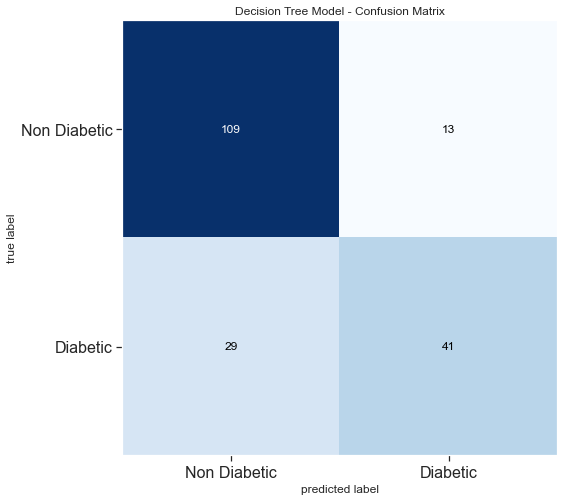

In [45]:
cm = confusion_matrix(y_actual,coded_preds)
print('The confusion matrix is:',cm)

plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Non Diabetic","Diabetic"], fontsize=16)
plt.yticks(range(2), ["Non Diabetic","Diabetic"], fontsize=16)
plt.show()

In [46]:
recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
F1_score = (2 * precision * recall) / (precision + recall)
print('The precision score is:',precision)
print('The F1 Score is:',F1_score)
print('----------------------------')
print('----------------------------')
print('----------------------------')

The precision score is: 89.34426229508196
The F1 Score is: 83.84615384615384
----------------------------
----------------------------
----------------------------


Decision Tree using Sklearn

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [48]:
features = ["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction","Age"]

In [49]:
x = data[features] 

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)

In [51]:
sk_tree = DecisionTreeClassifier(max_depth=6)

In [52]:
sk_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [53]:
sk_predicted = sk_tree.predict(x_test)

The confusion matrix is: [[106  28]
 [ 22  36]]


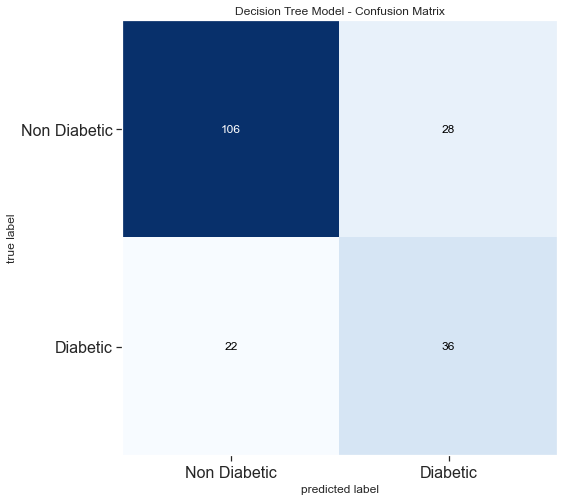

In [54]:
cm = confusion_matrix(y_test,sk_predicted)
print('The confusion matrix is:',cm)

plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Non Diabetic","Diabetic"], fontsize=16)
plt.yticks(range(2), ["Non Diabetic","Diabetic"], fontsize=16)
plt.show()

In [55]:
recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
F1_score = (2 * precision * recall) / (precision + recall)

print('The precision score is:',precision)
print('The F1 Score is:',F1_score)

print('----------------------------')
print('----------------------------')
print('----------------------------')

The precision score is: 79.1044776119403
The F1 Score is: 80.91603053435114
----------------------------
----------------------------
----------------------------


Visualizing a Decision Tree

In [56]:
import pydotplus


from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [57]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

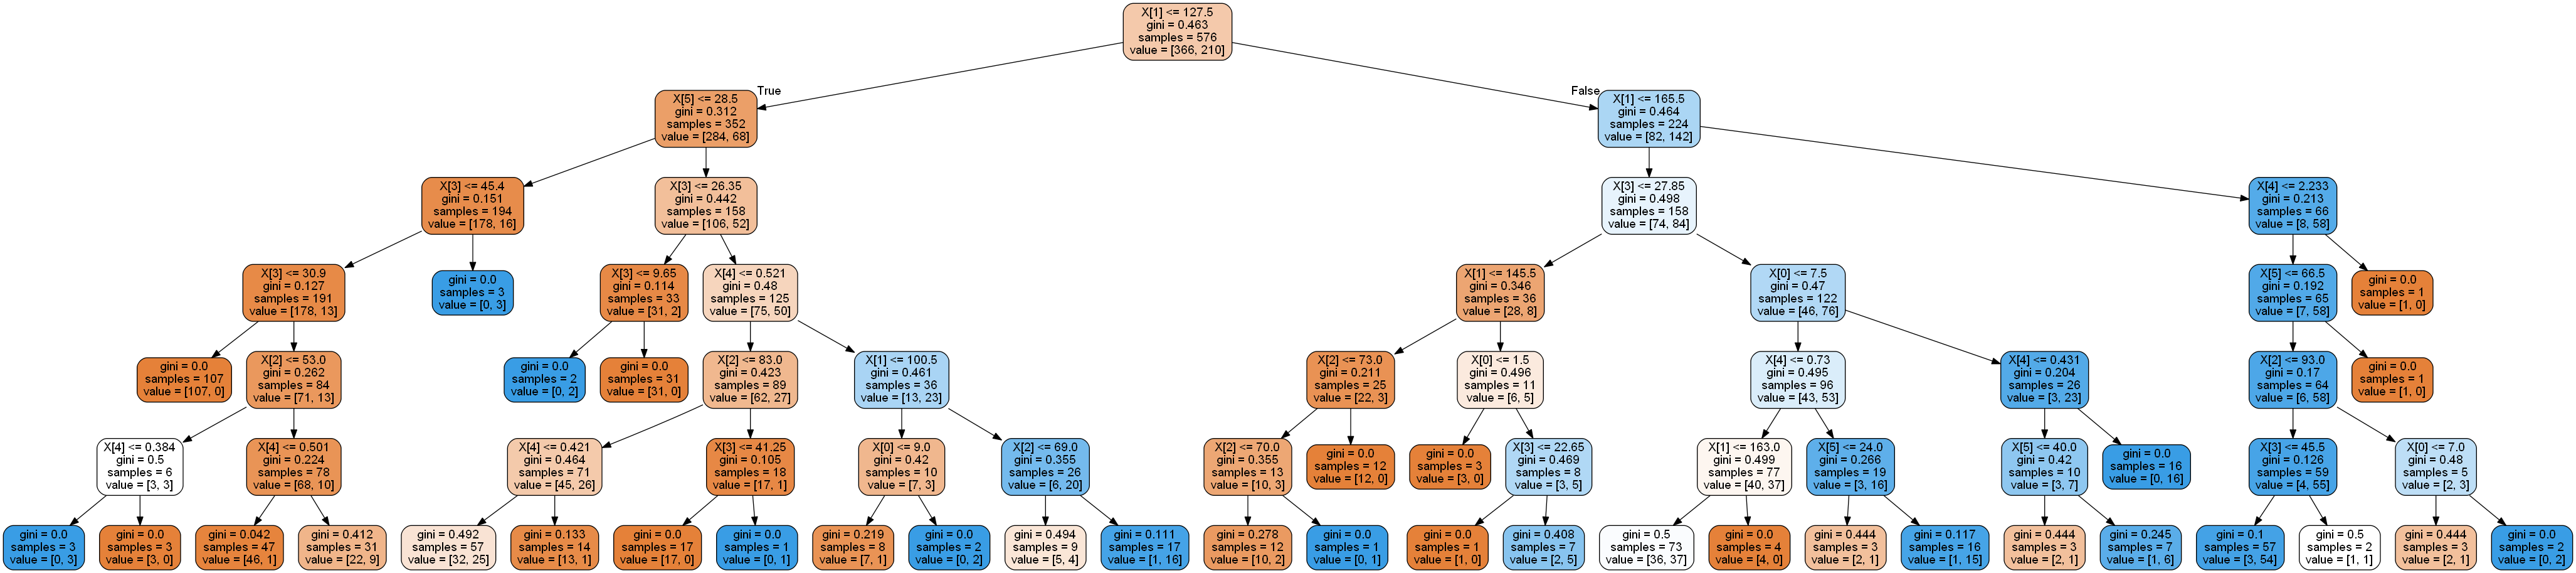

In [58]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())